In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import pickle

df = pd.read_csv('./data.csv')
model_file = "model.sav"

# Remove id column
df.drop(["Unnamed: 0"],  axis=1, inplace=True)

In [2]:
attractions_cols = list(range(7,21))

df_user_prefs = df.drop(df.columns[attractions_cols], axis=1)

In [3]:
df_user_prefs.head(5)

,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,music_style_Forró/Sertanejo,music_style_MPB,music_style_Pop,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,23,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,24,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,21,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,24,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,26,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [4]:
# Normalize the dataframe
scaler = StandardScaler()
normData = scaler.fit_transform(df_user_prefs)
df_user_prefs = pd.DataFrame(normData, columns=df_user_prefs.columns)

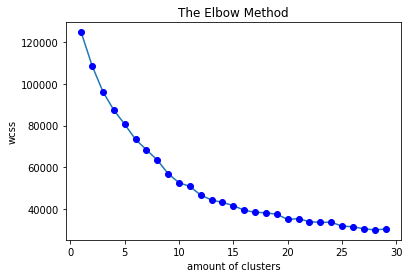

In [5]:
# Find optimal cluster amount
wcss = []
amount_clusters = range(1,30)

for n in amount_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df_user_prefs)
    wcss.append(kmeans.inertia_)
  
plt.title('The Elbow Method')
plt.xlabel("amount of clusters")
plt.ylabel("wcss")
plt.plot(amount_clusters, wcss)
plt.plot(amount_clusters, wcss, 'bo')

In [6]:
# Use PCA to reduce the dataset to two columns
df_values = df_user_prefs.values
pca = PCA(n_components=2)
pca_values = pca.fit_transform(df_values)
pca_df = pd.DataFrame(data=pca_values, columns=['C1','C2'])

pca_df

,C1,C2
0,-0.300161,2.789594
1,0.928941,0.278072
2,-0.421325,3.621790
3,-3.935698,-2.368882
4,-1.151257,-1.469944
...,...,...
4020,-2.156721,-0.797261
4021,-0.352588,3.434759
4022,0.119844,-0.061273
4023,0.564055,-0.862834


In [7]:
def get_model(amt_clusters):
  try:
    model = pickle.load(open(model_file, 'rb'))
    labels = model.labels_
    print("Loaded model")
    return model
  except:
    print("Saved model")
    model = KMeans(n_clusters=amt_clusters, random_state=12345)
    pickle.dump(model, open(model_file, 'wb'))
    return model

model = get_model(9)
model.fit(df_user_prefs)
labels = model.predict(df_user_prefs)

Loaded model


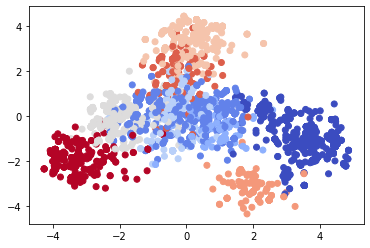

In [8]:
# Visualize the clusters
plt.scatter(pca_df['C1'], pca_df['C2'], c=labels, cmap="coolwarm")

In [9]:
# Amount of users per cluster
Counter(labels)

Counter({7: 205,
         1: 780,
         5: 578,
         8: 539,
         6: 178,
         2: 226,
         0: 685,
         3: 313,
         4: 521})

In [10]:
df.head(3)

,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,ibirapuera,masp,jadim_pref,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,23,1,0,0,0,1,0,5,3,3,...,0,0,0,0,0,1,0,0,1,0
1,24,0,0,0,0,1,0,4,2,5,...,0,0,0,0,1,0,0,1,0,0
2,21,1,0,0,1,1,0,5,5,5,...,0,0,1,0,0,0,0,1,0,0


In [11]:
# Insert a column with the user cluster
df.insert(0, "label", labels)

In [12]:
df.head(3)

,label,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,ibirapuera,masp,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,7,23,1,0,0,0,1,0,5,3,...,0,0,0,0,0,1,0,0,1,0
1,1,24,0,0,0,0,1,0,4,2,...,0,0,0,0,1,0,0,1,0,0
2,5,21,1,0,0,1,1,0,5,5,...,0,0,1,0,0,0,0,1,0,0


In [13]:
def get_attractions_means(user_data):
  attractions_means = {}
  user_cluster = int(model.predict(user_data))
  print("User Cluster: " + str(user_cluster))
  df_cluster = df[df["label"] == user_cluster]
  for i in range(8,22):
    attraction_mean = df_cluster.iloc[:,i].mean()
    attractions_means[df.columns[i]] = attraction_mean
  return attractions_means

def get_recommended_attractions(user_data):
  means = get_attractions_means(user_data)
  return sorted(means, key=means.get, reverse=True)[:5]

In [14]:
user = [
    [21,  1,  0,  0,  0,  1,  0, 0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, 0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0],
]

get_recommended_attractions(user)

User Cluster: 6


['jadim_pref', 'terraco_italia', 'eataly', 'la_guapa', 'mirante']